In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
lf = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/modified_data.pkl')
kf = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/modified_data.pkl')
print(lf['TEXT'][0])

Minutes of the Federal Open Market Committee  
January 30 –31, 2018  
A joint meeting of the Federal Open Market Committee 
and the Board of Governors was held in the offices of the Board of Governors of the Federal Reserve System in Washington, D.C., on Tuesday, January 30, 2018, at 10:00 a.m. and continued on Wednesday, January 31, 2018, at 9:00 a.m.
1 
PRESENT:  
Janet L. Yellen, Chair  
William C. Dudley, Vice Chairman  
Thomas I. Barkin  
Raphael W. Bostic  
Lael Brainard  
Loretta J. Mester Jerome H. Powell  
Randal K. Quarles  
John C. Williams  
J
ames Bullard, Charles L. Evans, Esther L. George, 
Michael Strine, and Eric Rosengren, Alternate Members of the Federal Open Market Committee  
P
atrick Harker, Robert S. Kaplan, and Neel Kashkari, 
Presidents of the Federal Reserve Banks of Philadelphia, Dallas, and Minneapolis, respectively  
J
ames A. Clouse, Secret ary 
Matthew M. Luecke, Deputy Secretary  
David W. Skidmore, Assistant Secretary  
Michelle A. Smith, Assistant Secr

In [13]:
def preprocessing_TEXT(df):
        """
        Preprocess the TEXT data by removing non-alphabetic characters, urls and mentions
        """
        # encode all text that has encoding starting with \
        df['TEXT'] = df['TEXT'].str.encode('ascii', 'ignore').str.decode('ascii')

        # remove all non-ascii characters
        df['TEXT'] = df['TEXT'].str.replace(r'[^\x00-\x7F]+', '')

        # remove all non-alphanumeric characters
        # df['TEXT'] = df['TEXT'].str.replace(r'[^a-zA-Z0-9\s]', '')

        # remove all single characters
        df['TEXT'] = df['TEXT'].str.replace(r'\b[a-zA-Z]\b', '')

        # trim all leading and trailing whitespaces
        df['TEXT'] = df['TEXT'].str.strip()

        # remove all whitespaces
        df['TEXT'] = df['TEXT'].str.replace(r'\s+', ' ')

        # to lowercase
        df['TEXT'] = df['TEXT'].str.lower()

        return df
df = preprocessing_TEXT(lf)
print(len(df['TEXT'][0].split('.')))

<ipython-input-13-46c4bf0d9c05>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['TEXT'] = df['TEXT'].str.replace(r'[^\x00-\x7F]+', '')
<ipython-input-13-46c4bf0d9c05>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['TEXT'] = df['TEXT'].str.replace(r'\b[a-zA-Z]\b', '')
<ipython-input-13-46c4bf0d9c05>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df['TEXT'] = df['TEXT'].str.replace(r'\s+', ' ')


570


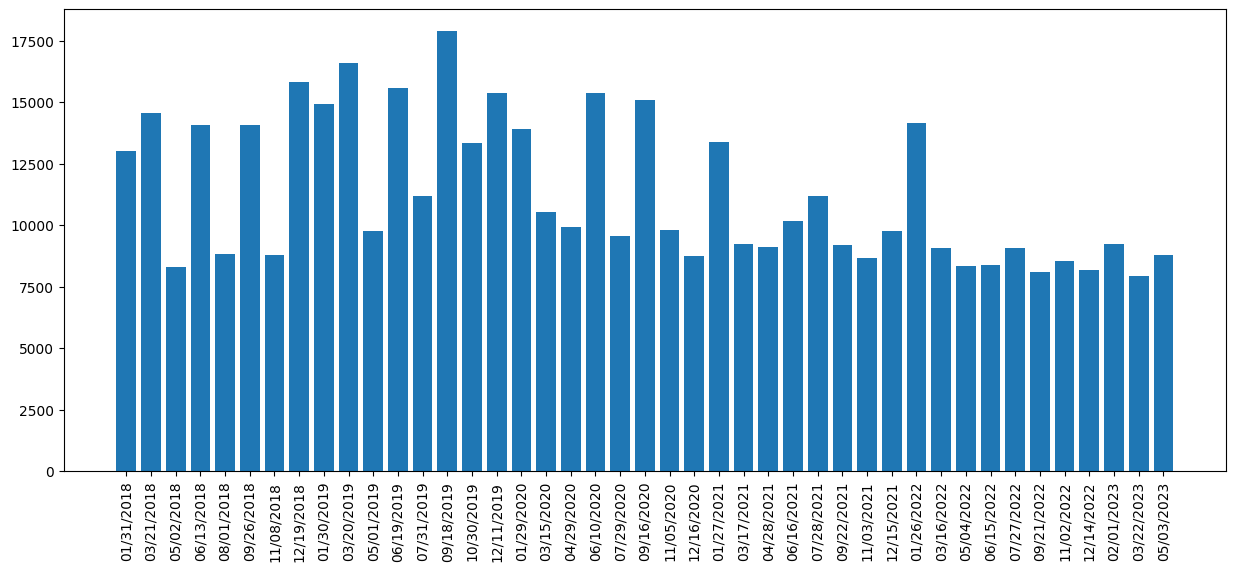

In [15]:
df['word_count'] = kf['TEXT'].str.lower().str.split().str.len()
# print(df['word_count'])
plt.figure(figsize=(15,6))
plt.bar(df['DATE'],df['word_count'])
plt.xticks(rotation = 90) 
plt.show()

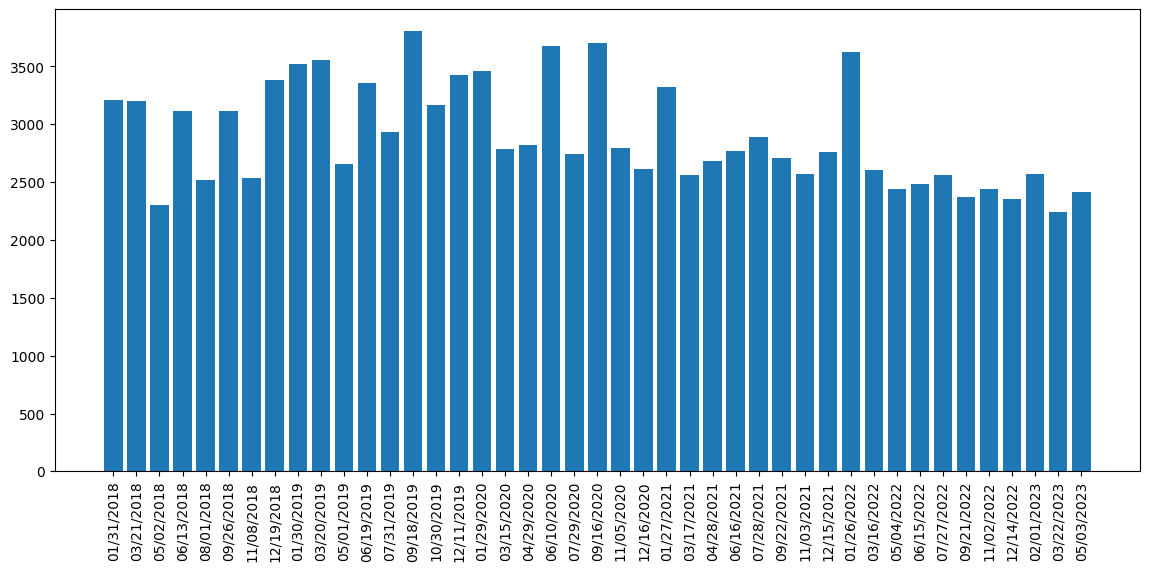

In [16]:
df['unique_words'] = kf['TEXT'].apply(lambda x: len(set(x.lower().split(' '))))
plt.figure(figsize=(14,6))
plt.bar(df['DATE'],df['unique_words'])
plt.xticks(rotation = 90) 
plt.show()

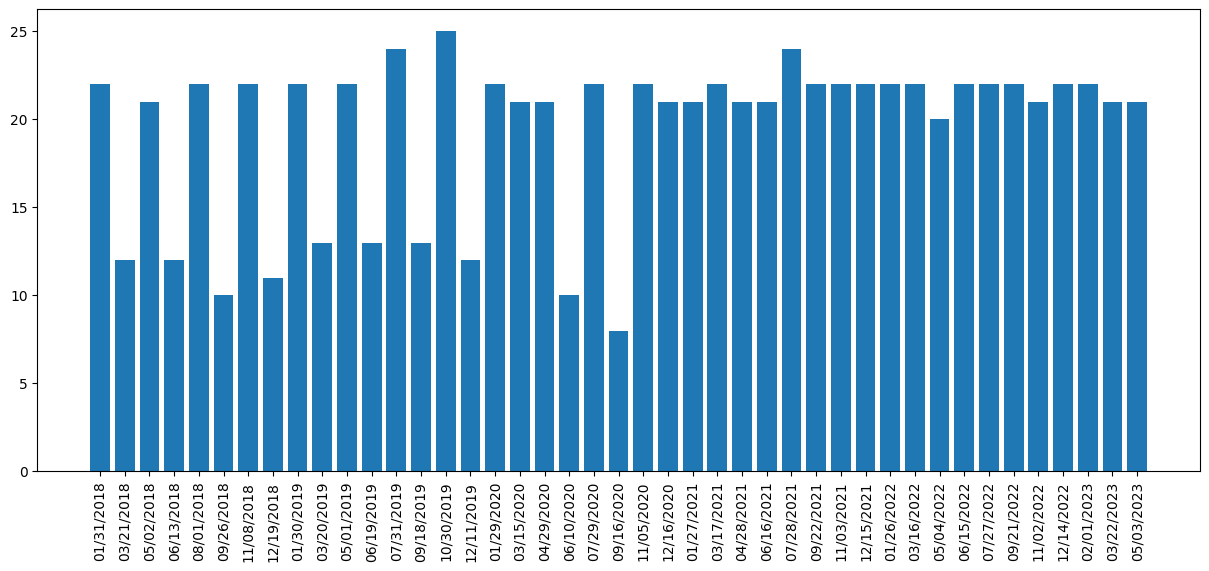

In [17]:
df['s_len'] = (df['TEXT'].str.lower().str.split(' ').str.len()/df['TEXT'].str.lower().str.split('.').str.len())
df = df.astype({"s_len":int})
plt.figure(figsize=(15,6))
plt.bar(df['DATE'],df['s_len'])
plt.xticks(rotation = 90) 
plt.show()